## Section 10, Class 86
### Python coding simple linear regression model

#### Import relevant libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
data = df.copy()
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
data['total_spent'] = np.sum(data[['TV', 'radio', 'newspaper']], axis=1)
data

,TV,radio,newspaper,sales,total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


#### Correlation between sales and total_spent

##### Scatterplot of total_spent and sales to see if there is any correlation between them

<AxesSubplot:xlabel='total_spent', ylabel='sales'>

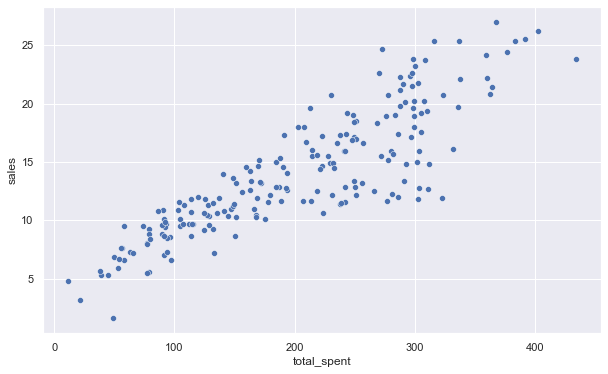

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_spent', y='sales')

##### Plot with the best fit line automatically calculate by the regplot method

<AxesSubplot:xlabel='total_spent', ylabel='sales'>

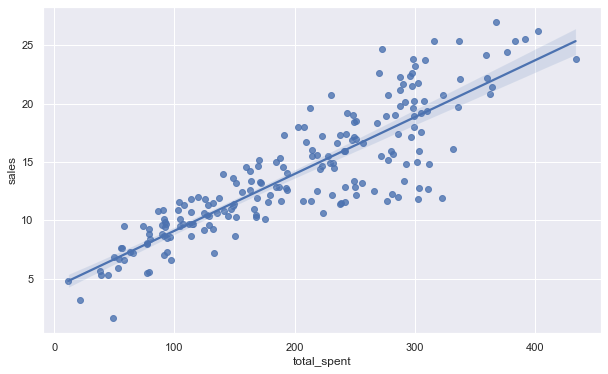

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='total_spent', y='sales')

In [19]:
X = data['total_spent']
y = data['sales']

##### Calculate the coefficients for a fit line y=mx+b

In [26]:
B1, B2 = np.polyfit(X, y, deg=1)
print('The coefficients for the fit line are:\nB1 = %.4f\nB2 = %.4f' % (B1, B2))

The coefficients for the fit line are:
B1 = 0.0487
B2 = 4.2430


##### Estimate the potential spent with the calculated fit line above

In [27]:
potential_spent = np.linspace(0, 500, 100)
predicted_sales = B1 * potential_spent + B2

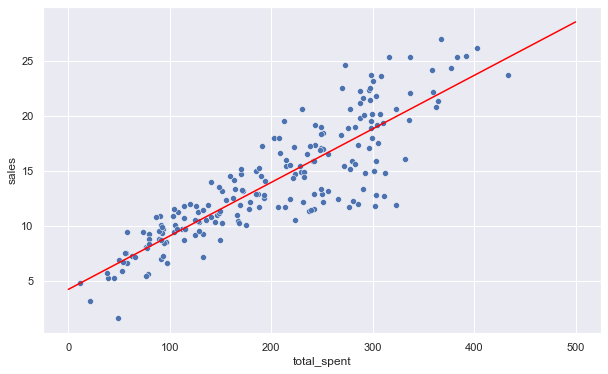

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_spent', y='sales')
plt.plot(potential_spent, predicted_sales, color='red')

##### Calculate the predicted_sales for a total_spent of $200

In [34]:
spent = 200
predicted_sales_2 = B1 * spent + B2
print('The predicted sales for $%.2f are %.2f' % (spent, predicted_sales_2))

The predicted sales for $200.00 are 13.98


#### Check if a higher order polynomial would fit better

In [35]:
potential_spent_2 = np.linspace(0, 500, 100)

##### Calculating the coefficients

In [36]:
C3, C2, C1, C0 = np.polyfit(X, y, deg=3)

##### Estimating sales

In [37]:
predicted_sales_3 = C3 * potential_spent**3 + C2 * potential_spent**2 + C1 * potential_spent + C0

##### Plot of the 3rd degree polynomial fit

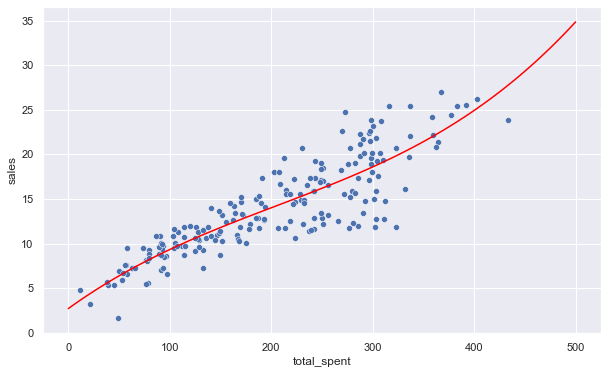

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_spent', y='sales')
plt.plot(potential_spent, predicted_sales_3, color='red')

In [40]:

predicted_sales_4 = C3 * spent**3 + C2 * spent**2 + C1 * spent + C0
print('The predicted sales for $%.2f are %.2f' % (spent, predicted_sales_4))

The predicted sales for $200.00 are 14.01
